In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib.gridspec import GridSpec
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from factor_analyzer import FactorAnalyzer
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import ElasticNet
from itertools import combinations
from kmodes.kprototypes import KPrototypes
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import DBSCAN
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

C:\Users\Yehan Perera\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Read the training data and test data into Dataframes
train_credit = pd.read_csv('train.csv')
test_credit = pd.read_csv('test.csv')

In [3]:
train_credit.head(20)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [4]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [5]:
test_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

In [6]:
# assign the corresponding english column names
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [7]:
# check the dataframe after rename of the columns
train_credit.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [8]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [9]:
# check info
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [10]:
# explicit check for any null values in the dataframe
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [11]:
train_credit.drop(columns=['Id'],inplace=True)

In [12]:
numerical_columns = ['duration', 'amount', 'age']
categorical_columns = [var for var in train_credit.columns if var not in numerical_columns]

In [13]:
y = train_credit['credit_risk']
x = train_credit.drop(columns=['credit_risk'])
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [14]:
x_train

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
9,1,11,4,0,3905,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
441,4,4,4,0,1455,1,4,2,3,1,1,1,42,3,2,3,2,1,1,2
656,2,18,4,3,1245,1,3,4,4,1,2,3,33,3,2,1,3,2,1,2
4,1,10,4,0,2241,1,2,1,3,1,3,1,48,3,1,2,2,1,1,1
520,4,48,3,3,7238,5,5,3,3,1,3,3,32,1,2,2,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,4,12,4,6,2096,1,4,2,3,1,3,1,49,3,2,1,2,1,1,2
229,3,12,2,2,2251,1,3,1,2,1,2,3,46,3,2,1,2,2,1,2
101,3,24,2,2,1925,1,3,2,3,1,2,1,26,3,2,1,3,2,1,2
789,1,14,2,0,8978,1,5,1,1,1,4,2,45,3,2,1,4,2,2,1


In [15]:
from sklearn.ensemble import IsolationForest

In [16]:
clf = IsolationForest(contamination=0.1)
clf.fit(x_train)
predictions = clf.predict(x_train)

In [17]:
sum(predictions==1)

540

In [18]:
sum(predictions==-1)

60

### Clustering

### Without Standardizing

### Kmeans

In [19]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns
# Filter out all warnings
warnings.filterwarnings('ignore')


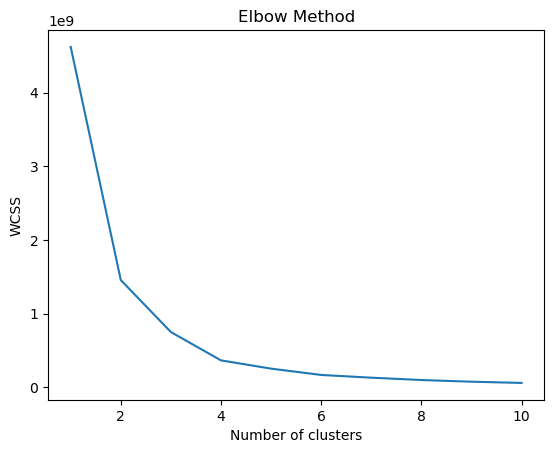

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

The average silhouette score is: 0.6070409214161803


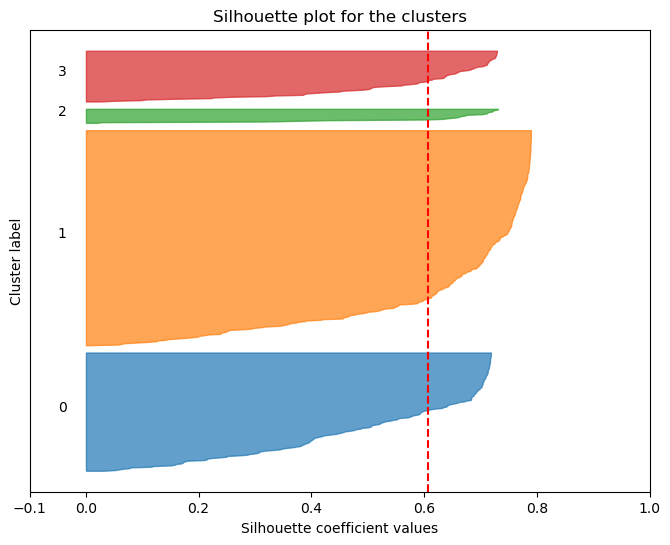

In [22]:
silhouette_avg = silhouette_score(x_train, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


sample_silhouette_values = silhouette_samples(x_train, cluster_labels)


fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)


cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")


ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [23]:
# Count the number of observations in each cluster
cluster_counts = np.bincount(cluster_labels)

# Print the number of observations in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} observations")


Cluster 0: 178 observations
Cluster 1: 323 observations
Cluster 2: 22 observations
Cluster 3: 77 observations


In [24]:
# Initialize lists to store proportions for each cluster
proportions_0s = []
proportions_1s = []

# Iterate over each cluster
for cluster_label in range(4):  # Assuming there are 4 clusters
    # Filter y_test based on the cluster label
    y_test_cluster = y_train[cluster_labels == cluster_label]
    
    # Count the number of occurrences of 0s and 1s in y_test_cluster
    y_test_cluster_counts = np.bincount(y_test_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_test_cluster)
    proportion_0s = y_test_cluster_counts[0] / total_samples_cluster
    proportion_1s = y_test_cluster_counts[1] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_0s.append(proportion_0s)
    proportions_1s.append(proportion_1s)

# Print proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Proportion of 0s = {proportions_0s[i]}, Proportion of 1s = {proportions_1s[i]}")


Cluster 0: Proportion of 0s = 0.1853932584269663, Proportion of 1s = 0.8146067415730337
Cluster 1: Proportion of 0s = 0.22910216718266255, Proportion of 1s = 0.7708978328173375
Cluster 2: Proportion of 0s = 0.5454545454545454, Proportion of 1s = 0.45454545454545453
Cluster 3: Proportion of 0s = 0.3116883116883117, Proportion of 1s = 0.6883116883116883


### KMedioid


In [25]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


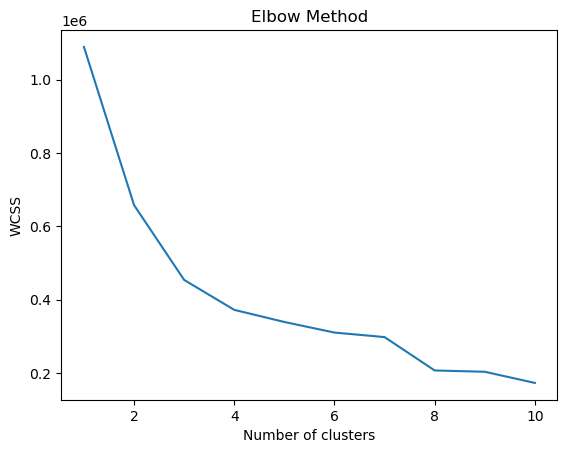

The average silhouette score is: 0.5264440134744032


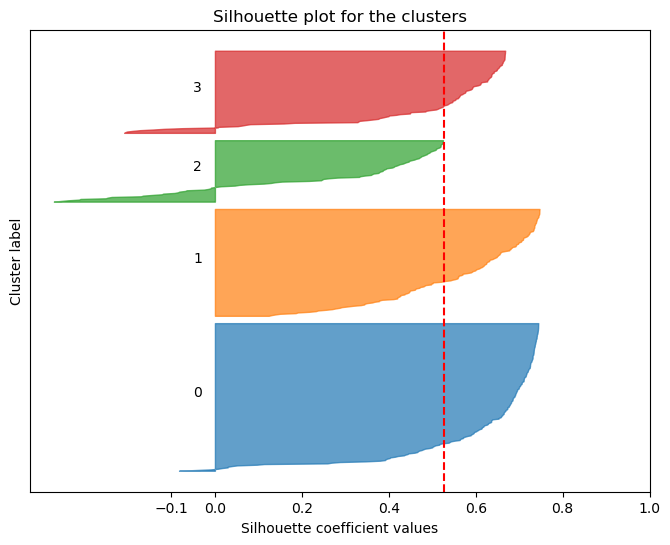

In [26]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(x_train)
    wcss.append(kmedoids.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(x_train)
cluster_labels = kmedoids.labels_

silhouette_avg = silhouette_score(x_train, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

sample_silhouette_values = silhouette_samples(x_train, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [27]:
# Count the number of observations in each cluster
cluster_counts = np.bincount(cluster_labels)

# Print the number of observations in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} observations")


Cluster 0: 222 observations
Cluster 1: 161 observations
Cluster 2: 93 observations
Cluster 3: 124 observations


In [28]:
# Initialize lists to store proportions for each cluster
proportions_0s = []
proportions_1s = []

# Iterate over each cluster
for cluster_label in range(4):  # Assuming there are 4 clusters
    # Filter y_test based on the cluster label
    y_test_cluster = y_train[cluster_labels == cluster_label]
    
    # Count the number of occurrences of 0s and 1s in y_test_cluster
    y_test_cluster_counts = np.bincount(y_test_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_test_cluster)
    proportion_0s = y_test_cluster_counts[0] / total_samples_cluster
    proportion_1s = y_test_cluster_counts[1] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_0s.append(proportion_0s)
    proportions_1s.append(proportion_1s)

# Print proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Proportion of 0s = {proportions_0s[i]}, Proportion of 1s = {proportions_1s[i]}")


Cluster 0: Proportion of 0s = 0.22972972972972974, Proportion of 1s = 0.7702702702702703
Cluster 1: Proportion of 0s = 0.19875776397515527, Proportion of 1s = 0.8012422360248447
Cluster 2: Proportion of 0s = 0.3870967741935484, Proportion of 1s = 0.6129032258064516
Cluster 3: Proportion of 0s = 0.1935483870967742, Proportion of 1s = 0.8064516129032258


### With Standardizing

### Kmeans

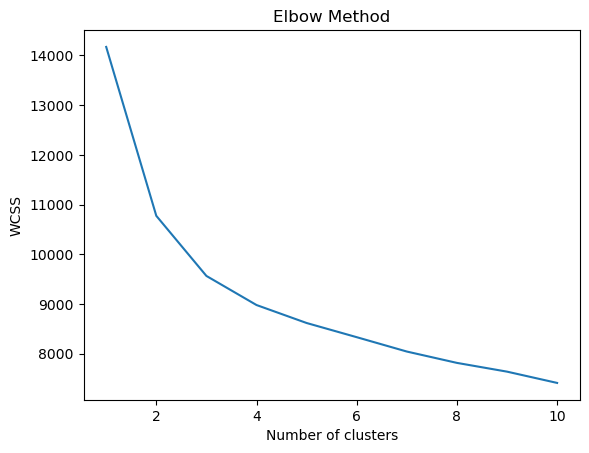

The average silhouette score is: 0.12414846528042581


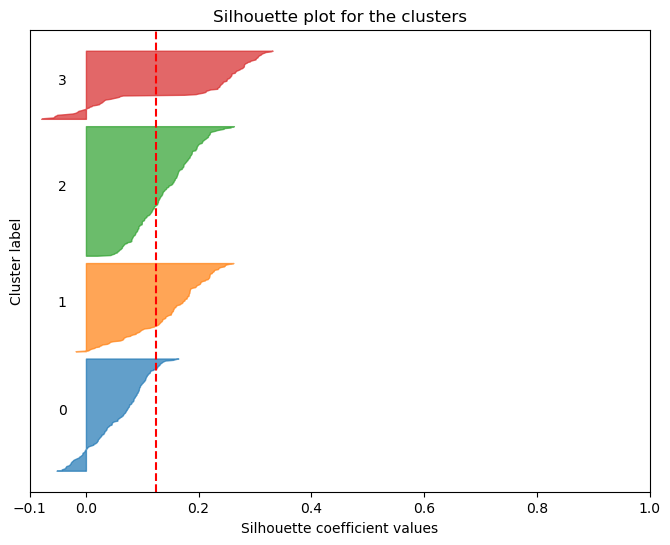

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

# Assuming numerical_columns is a list of numerical column names in your dataset

scaler = StandardScaler()
x_train_scaled_ = scaler.fit_transform(x_train[numerical_columns])
x_tt = x_train.drop(columns=['duration', 'amount', 'age'])
x_tt[['duration', 'amount', 'age']] = x_train_scaled_
x_train_scaled = x_tt
x_train_scaled

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train_scaled)
cluster_labels = kmeans.labels_

silhouette_avg = silhouette_score(x_train_scaled, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

sample_silhouette_values = silhouette_samples(x_train_scaled, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


In [30]:
# Initialize lists to store counts and proportions for each cluster
cluster_counts = []
proportions_0s = []
proportions_1s = []

for i in range(4):  # Assuming there are 4 clusters
    # Count the number of observations in each cluster
    count = np.sum(cluster_labels == i)
    cluster_counts.append(count)
    
    # Filter y_train based on the cluster label
    y_train_cluster = y_train[cluster_labels == i]
    
    # Count the number of occurrences of 0s and 1s in y_train_cluster
    y_train_cluster_counts = np.bincount(y_train_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_train_cluster)
    proportion_0s = y_train_cluster_counts[0] / total_samples_cluster
    proportion_1s = y_train_cluster_counts[1] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_0s.append(proportion_0s)
    proportions_1s.append(proportion_1s)

# Print counts and proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Count = {cluster_counts[i]}, Proportion of 0s = {proportions_0s[i]}, Proportion of 1s = {proportions_1s[i]}")


Cluster 0: Count = 169, Proportion of 0s = 0.3254437869822485, Proportion of 1s = 0.6745562130177515
Cluster 1: Count = 133, Proportion of 0s = 0.11278195488721804, Proportion of 1s = 0.8872180451127819
Cluster 2: Count = 195, Proportion of 0s = 0.19487179487179487, Proportion of 1s = 0.8051282051282052
Cluster 3: Count = 103, Proportion of 0s = 0.33980582524271846, Proportion of 1s = 0.6601941747572816


### KMedioid

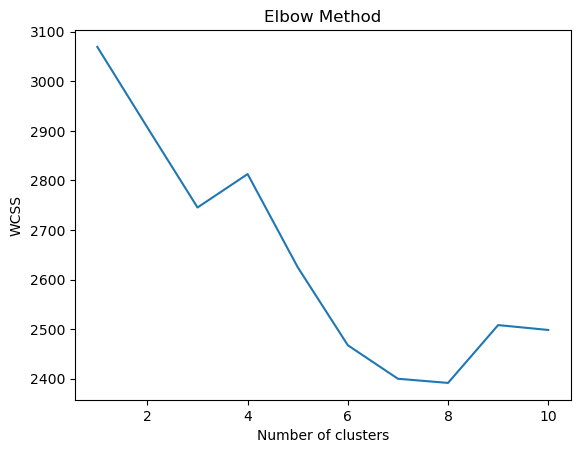

The average silhouette score is: 0.014785259788388058


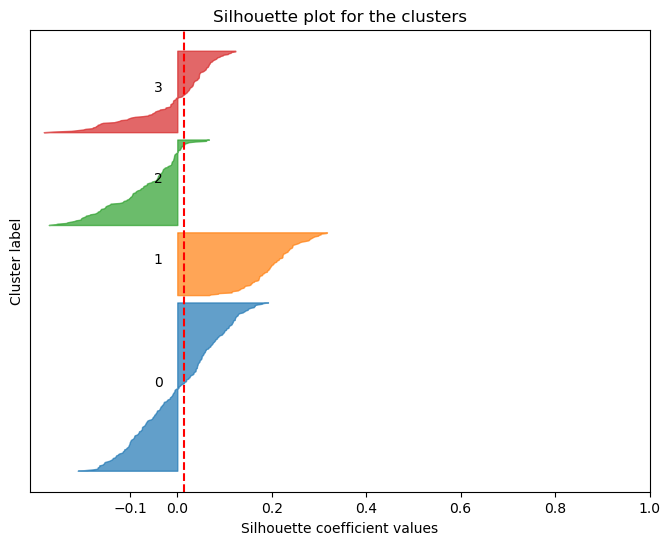

In [31]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import seaborn as sns

# Assuming numerical_columns is a list of numerical column names in your dataset

scaler = StandardScaler()
x_train_scaled_ = scaler.fit_transform(x_train[numerical_columns])
x_tt = x_train.drop(columns=['duration', 'amount', 'age'])
x_tt[['duration', 'amount', 'age']] = x_train_scaled_
x_train_scaled = x_tt
x_train_scaled



wcss = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=42)
    kmedoids.fit(x_train_scaled)
    wcss.append(kmedoids.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmedoids = KMedoids(n_clusters=4, random_state=42)
kmedoids.fit(x_train_scaled)
cluster_labels = kmedoids.labels_

silhouette_avg = silhouette_score(x_train_scaled, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

sample_silhouette_values = silhouette_samples(x_train_scaled, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

cluster_colors = sns.color_palette('tab10', n_colors=4)

y_lower = 10
for i in range(4):  
    
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cluster_colors[i]
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Silhouette plot for the clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [32]:
# Initialize lists to store counts and proportions for each cluster
cluster_counts = []
proportions_0s = []
proportions_1s = []

for i in range(4):  # Assuming there are 4 clusters
    # Count the number of observations in each cluster
    count = np.sum(cluster_labels == i)
    cluster_counts.append(count)
    
    # Filter y_train based on the cluster label
    y_train_cluster = y_train[cluster_labels == i]
    
    # Count the number of occurrences of 0s and 1s in y_train_cluster
    y_train_cluster_counts = np.bincount(y_train_cluster)
    
    # Calculate the proportion of 0s and 1s
    total_samples_cluster = len(y_train_cluster)
    proportion_0s = y_train_cluster_counts[0] / total_samples_cluster
    proportion_1s = y_train_cluster_counts[1] / total_samples_cluster
    
    # Append proportions to the lists
    proportions_0s.append(proportion_0s)
    proportions_1s.append(proportion_1s)

# Print counts and proportions for each cluster
for i in range(4):  # Assuming there are 4 clusters
    print(f"Cluster {i}: Count = {cluster_counts[i]}, Proportion of 0s = {proportions_0s[i]}, Proportion of 1s = {proportions_1s[i]}")


Cluster 0: Count = 253, Proportion of 0s = 0.15810276679841898, Proportion of 1s = 0.841897233201581
Cluster 1: Count = 95, Proportion of 0s = 0.3368421052631579, Proportion of 1s = 0.6631578947368421
Cluster 2: Count = 129, Proportion of 0s = 0.34108527131782945, Proportion of 1s = 0.6589147286821705
Cluster 3: Count = 123, Proportion of 0s = 0.21951219512195122, Proportion of 1s = 0.7804878048780488


### ML Models

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN, KMeans, HDBSCAN, AffinityPropagation, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion,Pipeline,make_pipeline
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

### Without Addressing Class Imbalance

### Without Standardizing

### Logistic

In [34]:
### Binary classification 
logreg_classifier = LogisticRegression( solver='liblinear', random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_logreg_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_logreg_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [35]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.70      0.25      0.36        57
           1       0.76      0.96      0.85       143

    accuracy                           0.76       200
   macro avg       0.73      0.60      0.61       200
weighted avg       0.74      0.76      0.71       200



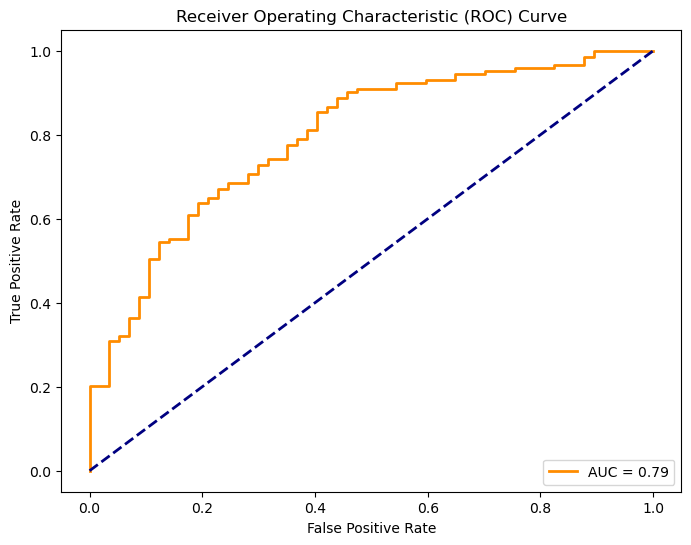

In [36]:
# Compute AUC and ROC curve
y_pred_proba = best_logreg_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### RandomForestClassifier

In [37]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_rf_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


report = classification_report(y_test, y_pred_test)
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [38]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.80      0.28      0.42        57
           1       0.77      0.97      0.86       143

    accuracy                           0.78       200
   macro avg       0.79      0.63      0.64       200
weighted avg       0.78      0.78      0.73       200



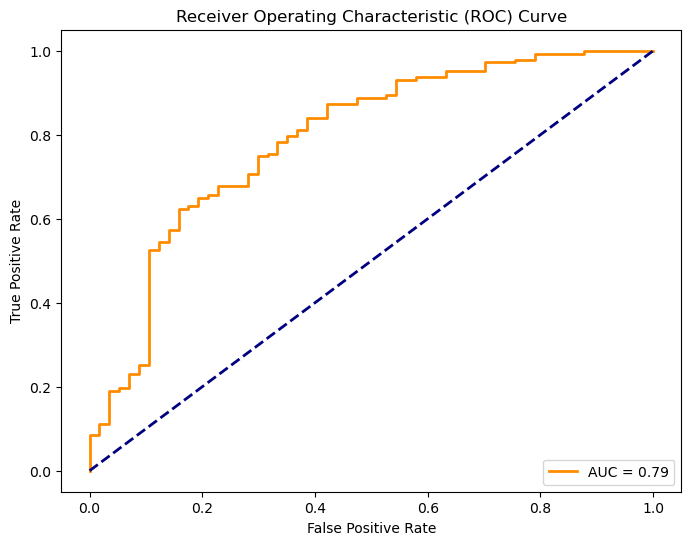

In [39]:
# Compute AUC and ROC curve
y_pred_proba =best_rf_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### svm_classifier

In [40]:
svm_classifier = SVC(probability=True)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=3, scoring='accuracy',n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_svm_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)


# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [41]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       1.00      0.04      0.07        57
           1       0.72      1.00      0.84       143

    accuracy                           0.73       200
   macro avg       0.86      0.52      0.45       200
weighted avg       0.80      0.72      0.62       200



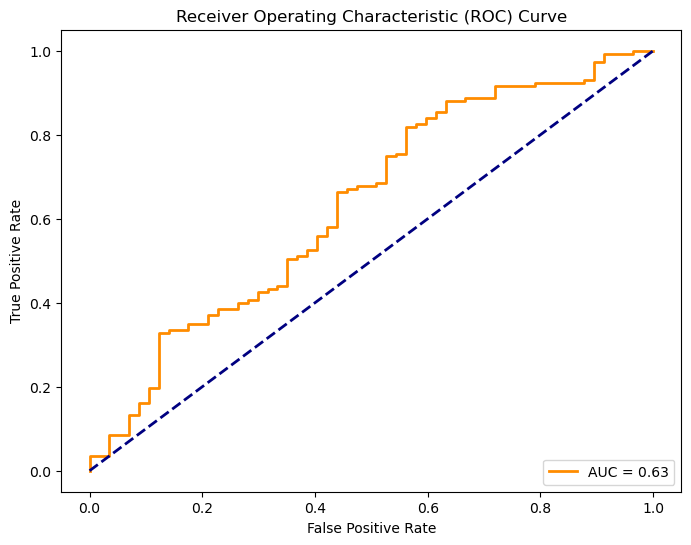

In [42]:
# Compute AUC and ROC curve
y_pred_proba = best_svm_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### KNeighborsClassifier

In [43]:
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_test_knn = best_knn_model.predict(x_test)

# Evaluate the performance on the test set
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)
classification_report_result_knn = classification_report(y_test, y_pred_test_knn)

# Generate the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Print results
print(f'Accuracy (KNN): {accuracy_knn}')
print('Classification Report (KNN):\n', classification_report_result_knn)
print('Confusion Matrix (KNN):\n', conf_matrix_knn)

Accuracy (KNN): 0.685
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.38      0.18      0.24        57
           1       0.73      0.89      0.80       143

    accuracy                           0.69       200
   macro avg       0.56      0.53      0.52       200
weighted avg       0.63      0.69      0.64       200

Confusion Matrix (KNN):
 [[ 10  47]
 [ 16 127]]


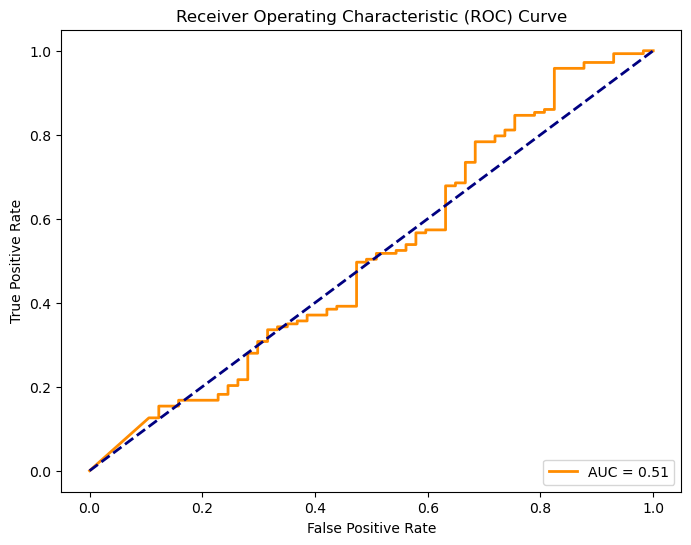

In [44]:
# Compute AUC and ROC curve
y_pred_proba =best_knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost classifier

In [111]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)



# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [112]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        57
           1       0.81      0.94      0.87       143

    accuracy                           0.80       200
   macro avg       0.78      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200



In [113]:
y_pred_train = best_xgb_model.predict(x_train)
conf_matrix_train = confusion_matrix(y_train,y_pred_train)
classification_report_result = classification_report(y_train, y_pred_train)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.96      0.77      0.86       143
           1       0.93      0.99      0.96       457

    accuracy                           0.94       600
   macro avg       0.95      0.88      0.91       600
weighted avg       0.94      0.94      0.94       600



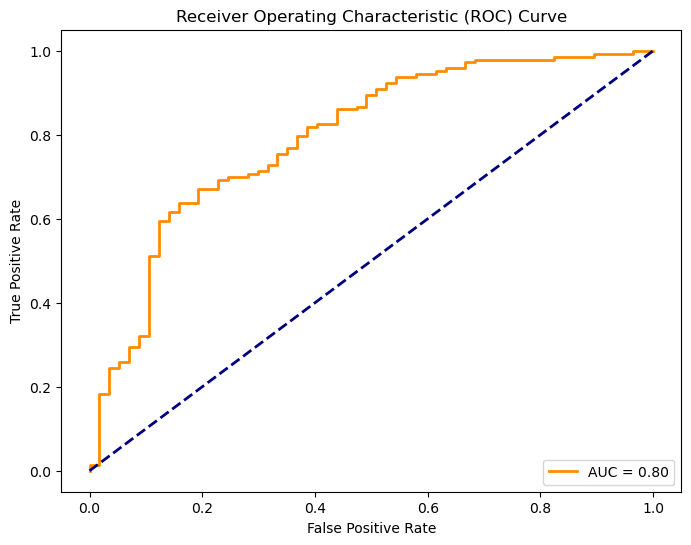

In [114]:
# Compute AUC and ROC curve
y_pred_proba =best_xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Applying RFE

In [109]:
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize RFE with 19 features
rfe = RFE(estimator=best_xgb_model, n_features_to_select=19)

# Fit RFE to the training data
rfe.fit(x_train, y_train)

# Get the selected features
selected_features = x_train.columns[rfe.support_]

# Train XGBoost model with selected features
best_xgb_model_rfe = best_xgb_model.fit(x_train[selected_features], y_train)

# Make predictions on the test set using the model with selected features
y_pred_test_rfe = best_xgb_model_rfe.predict(x_test[selected_features])

# Calculate accuracy
accuracy_rfe = accuracy_score(y_test, y_pred_test_rfe)

# Print the accuracy
print("Accuracy of XGBoost model with RFE (19 features):", accuracy_rfe)

Accuracy of XGBoost model with RFE (19 features): 0.8


### Applying Feature Importance

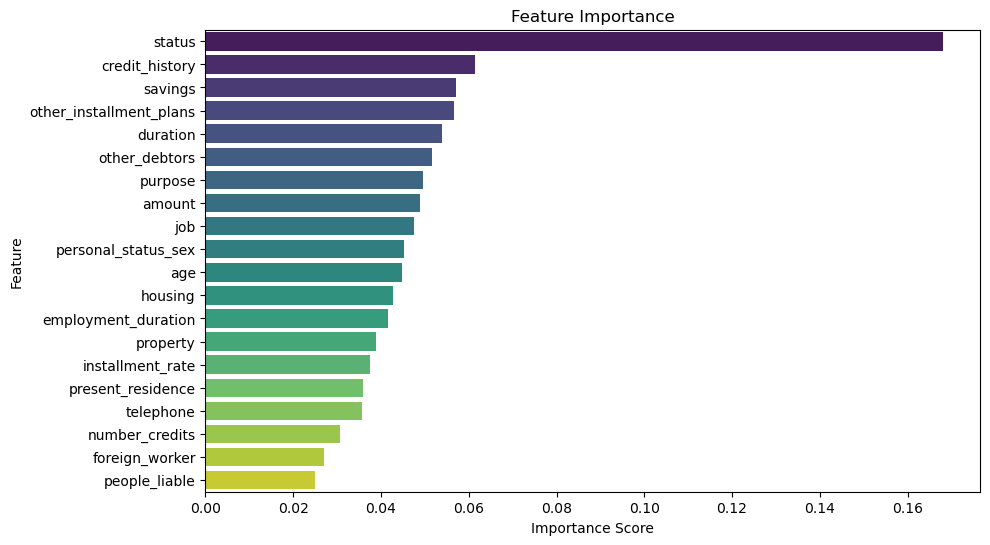

In [115]:
# Get feature importance
feature_importance = best_xgb_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Removing least important variables and Fitting XGB

### people_liable

In [116]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['people_liable']), y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['people_liable']))



# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

y_pred_train= best_xgb_model.predict(x_train.drop(columns=['people_liable']))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print(classification_report_result)

              precision    recall  f1-score   support

           0       0.73      0.47      0.57        57
           1       0.82      0.93      0.87       143

    accuracy                           0.80       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.79      0.80      0.79       200



### people_liable AND foreign_worker

In [118]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train.drop(columns=['people_liable','foreign_worker']), y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test.drop(columns=['people_liable','foreign_worker']))



# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

y_pred_train= best_xgb_model.predict(x_train.drop(columns=['people_liable','foreign_worker']))
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

print(classification_report_result)

              precision    recall  f1-score   support

           0       0.70      0.46      0.55        57
           1       0.81      0.92      0.86       143

    accuracy                           0.79       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.78      0.79      0.77       200



### DecisionTreeClassifier

In [49]:
# Define the base classifier (DecisionTreeClassifier in this example)
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best model from grid search
best_bagging_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_bagging_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

In [50]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.66      0.37      0.47        57
           1       0.79      0.92      0.85       143

    accuracy                           0.77       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.77      0.74       200



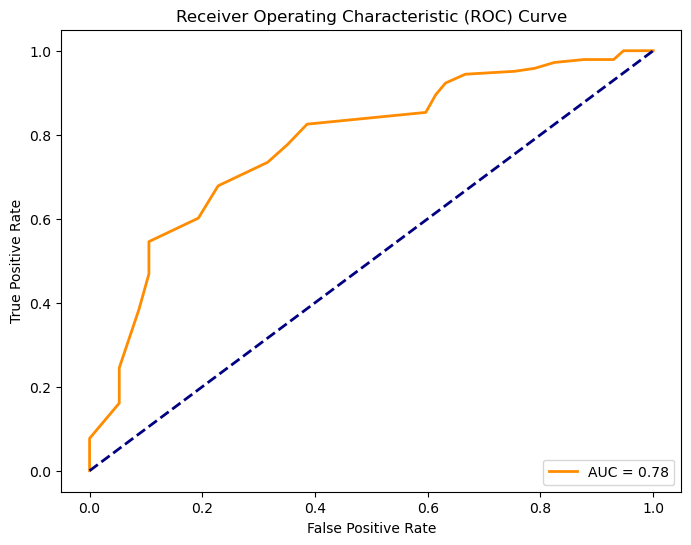

In [51]:
# Compute AUC and ROC curve
y_pred_proba =best_bagging_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### With Standardizing

### XGBoost classifier

In [52]:
# Standardize the numerical columns
scaler = StandardScaler()
x_train_scaled_ = scaler.fit_transform(x_train[numerical_columns])
x_tt = x_train.drop(columns=['duration', 'amount', 'age'])
x_tt[['duration', 'amount', 'age']] = x_train_scaled_
x_train_scaled = x_tt
x_train_scaled

x_test_scaled_ = scaler.fit_transform(x_test[numerical_columns])
x_tt = x_test.drop(columns=['duration', 'amount', 'age'])
x_tt[['duration', 'amount', 'age']] = x_test_scaled_
x_test_scaled = x_tt
x_test_scaled

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,duration,amount,age
425,2,4,0,2,2,4,1,1,2,3,3,2,1,3,2,2,2,0.222048,0.226860,0.246552
48,4,2,0,5,3,4,3,1,4,1,3,2,1,3,2,1,2,1.218149,-0.054496,0.153338
97,4,4,3,1,2,3,4,1,3,4,3,3,3,3,2,2,2,0.222048,0.658225,1.178696
285,4,4,1,5,1,2,3,1,4,4,3,2,1,4,2,2,2,-0.276003,-0.001676,0.339767
759,2,2,0,1,2,4,3,1,2,1,1,2,1,2,2,1,2,0.222048,-0.699960,-1.058450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,4,2,0,3,4,1,2,1,2,3,1,2,1,4,2,1,2,-0.026978,-0.159081,-0.312734
319,4,4,2,3,3,4,3,1,4,1,3,2,2,3,2,2,2,1.716200,0.284258,0.153338
144,4,4,0,1,2,4,2,1,1,2,3,2,2,3,2,1,2,-0.276003,-0.767218,-0.405949
512,1,4,2,1,5,1,2,1,4,2,3,2,2,3,2,1,2,-0.109986,0.365601,-0.965235


In [53]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test_scaled)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)



# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)



In [54]:
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.74      0.40      0.52        57
           1       0.80      0.94      0.87       143

    accuracy                           0.79       200
   macro avg       0.77      0.67      0.69       200
weighted avg       0.78      0.79      0.77       200



In [55]:
y_pred_train = best_xgb_model.predict(x_train_scaled)
conf_matrix_train = confusion_matrix(y_train,y_pred_train)
classification_report_result = classification_report(y_train, y_pred_train)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       143
           1       0.96      0.99      0.98       457

    accuracy                           0.96       600
   macro avg       0.97      0.93      0.94       600
weighted avg       0.96      0.96      0.96       600



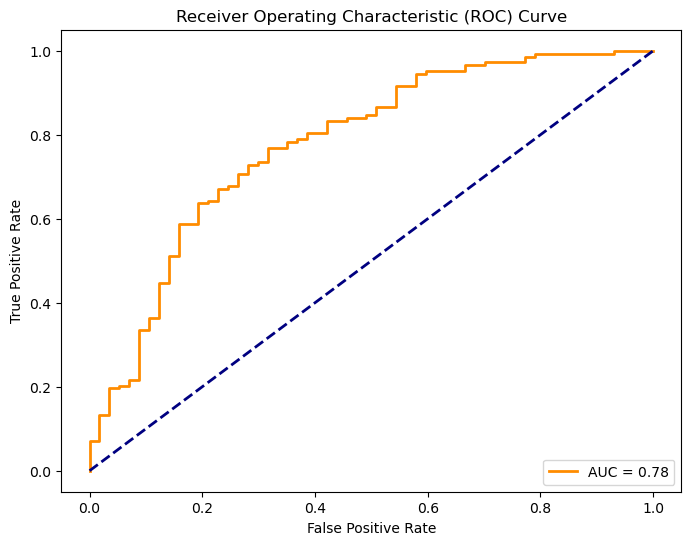

In [56]:
# Compute AUC and ROC curve
y_pred_proba =best_xgb_model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Addressing Class Imbalance

In [57]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


### ADASYN

In [58]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [60]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
x_res,y_res = ada.fit_resample(x_train,y_train)
Counter(y_res)

Counter({1: 457, 0: 427})

In [61]:
x_test_res,y_test_res = ada.fit_resample(x_test,y_test)

In [65]:
xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_res, y_res)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test_res)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test_res, y_pred_test)
classification_report_result = classification_report(y_test_res, y_pred_test)



# Generate the confusion matrix(test)
conf_matrix = confusion_matrix(y_test_res, y_pred_test)

print(classification_report_result)

# Generate the confusion matrix(train)
y_pred_train = best_xgb_model.predict(x_res)
conf_matrix_train = confusion_matrix(y_res,y_pred_train)
classification_report_result = classification_report(y_res, y_pred_train)

print(classification_report_result)





              precision    recall  f1-score   support

           0       0.84      0.76      0.80       147
           1       0.77      0.85      0.81       143

    accuracy                           0.80       290
   macro avg       0.81      0.80      0.80       290
weighted avg       0.81      0.80      0.80       290

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       427
           1       1.00      1.00      1.00       457

    accuracy                           1.00       884
   macro avg       1.00      1.00      1.00       884
weighted avg       1.00      1.00      1.00       884



In [64]:
# Compute AUC and ROC curve
y_pred_proba =best_xgb_model.predict_proba(x_res)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_res, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [290, 884]

### SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=3)
x_res, y_res = smote.fit_resample(x_train, y_train)
print(Counter(y_res))

x_test_res, y_test_res = smote.fit_resample(x_test, y_test)

xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_res, y_res)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test_res)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test_res, y_pred_test)
classification_report_result = classification_report(y_test_res, y_pred_test)

# Generate the confusion matrix(test)
conf_matrix = confusion_matrix(y_test_res, y_pred_test)

print(classification_report_result)

# Generate the confusion matrix(train)
y_pred_train = best_xgb_model.predict(x_res)
conf_matrix_train = confusion_matrix(y_res, y_pred_train)
classification_report_result = classification_report(y_res, y_pred_train)

print(classification_report_result)


Counter({1: 457, 0: 457})
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       143
           1       0.79      0.84      0.81       143

    accuracy                           0.81       286
   macro avg       0.81      0.81      0.81       286
weighted avg       0.81      0.81      0.81       286

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       1.00      1.00      1.00       457

    accuracy                           1.00       914
   macro avg       1.00      1.00      1.00       914
weighted avg       1.00      1.00      1.00       914



### Upsampling

In [74]:
from sklearn.utils import resample

# Separate majority and minority classes
x_train_majority = x_train[y_train == 0]
x_train_minority = x_train[y_train == 1]

# Upsample minority class
x_train_minority_upsampled = resample(x_train_minority, 
                                      replace=True,     # Sample with replacement
                                      n_samples=len(x_train_majority),    # Match number of samples in majority class
                                      random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
x_train_upsampled = np.concatenate([x_train_majority, x_train_minority_upsampled])
y_train_upsampled = np.concatenate([np.zeros(len(x_train_majority)), np.ones(len(x_train_minority_upsampled))])

print("Before upsampling:")
print(Counter(y_train))

print("After upsampling:")
print(Counter(y_train_upsampled))

xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train_upsampled, y_train_upsampled)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Generate the confusion matrix(test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(classification_report_result)

# Generate the confusion matrix(train)
y_pred_train = best_xgb_model.predict(x_res)
conf_matrix_train = confusion_matrix(y_res, y_pred_train)
classification_report_result = classification_report(y_res, y_pred_train)

print(classification_report_result)



Before upsampling:
Counter({1: 457, 0: 143})
After upsampling:
Counter({0.0: 143, 1.0: 143})
              precision    recall  f1-score   support

           0       0.46      0.81      0.59        57
           1       0.89      0.62      0.73       143

    accuracy                           0.68       200
   macro avg       0.68      0.71      0.66       200
weighted avg       0.77      0.68      0.69       200

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       457
           1       0.90      0.72      0.80       457

    accuracy                           0.82       914
   macro avg       0.83      0.82      0.82       914
weighted avg       0.83      0.82      0.82       914



###  Downsampling

In [77]:
from sklearn.utils import resample

# Separate majority and minority classes
x_train_majority = x_train[y_train == 0]
x_train_minority = x_train[y_train == 1]

# Downsample majority class
x_train_majority_downsampled = resample(x_train_majority,
                                        replace=True,    # Sample without replacement
                                        n_samples=len(x_train_minority),  # Match number of samples in minority class
                                        random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
x_train_downsampled = np.concatenate([x_train_majority_downsampled, x_train_minority])
y_train_downsampled = np.concatenate([np.zeros(len(x_train_minority)), np.ones(len(x_train_minority))])

print("Before downsampling:")
print(Counter(y_train))

print("After downsampling:")
print(Counter(y_train_downsampled))

xgb_classifier = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train_downsampled, y_train_downsampled)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_xgb_model.predict(x_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred_test)
classification_report_result = classification_report(y_test, y_pred_test)

# Generate the confusion matrix(test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(classification_report_result)

# Generate the confusion matrix(train)
y_pred_train = best_xgb_model.predict(x_train_downsampled)
conf_matrix_train = confusion_matrix(y_train_downsampled, y_pred_train)
classification_report_result = classification_report(y_train_downsampled, y_pred_train)

print(classification_report_result)


Before downsampling:
Counter({1: 457, 0: 143})
After downsampling:
Counter({0.0: 457, 1.0: 457})
              precision    recall  f1-score   support

           0       0.58      0.61      0.60        57
           1       0.84      0.83      0.83       143

    accuracy                           0.77       200
   macro avg       0.71      0.72      0.72       200
weighted avg       0.77      0.77      0.77       200

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       457
         1.0       0.99      0.99      0.99       457

    accuracy                           0.99       914
   macro avg       0.99      0.99      0.99       914
weighted avg       0.99      0.99      0.99       914

